In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
%matplotlib inline
import numbers
import ctypes
import _pickle as cPickle
import pydicom as dicom

import cv2
import os
import time
import PIL
import re
import math
import sys


import SimpleITK as sitk
from PIL import Image
from scipy import linalg

print ('OpenCV version = ' + cv2.__version__)
print("Using PyTorch Version %s" %torch.__version__)

OpenCV version = 3.4.2
Using PyTorch Version 1.3.1


In [3]:
# image = sitk.Image ( 256, 128, 64, sitk.sitkInt16 );

In [4]:
# How about 2d?
# twoD = sitk.Image ( 64, 64, sitk.sitkFloat32 )

In [13]:
pathname = '/user/iibi/skuanar/Downloads/featExtract1.6/featExtract1.6/ShibaNew/H-18151/H-18151_V2_INSP.nii'
image = sitk.ReadImage(pathname)

In [14]:
image.GetDimension()

3

In [15]:
# twoD.GetDimension()

In [16]:
image.GetSize()

(512, 512, 647)

In [17]:
print (image.GetWidth())

512


In [18]:
print (image.GetHeight())

512


In [19]:
print (image.GetDepth())

647


In [20]:
print (image.GetOrigin())


(0.0, 0.0, 0.0)


In [21]:
print (image.GetSpacing())

(1.0, 1.0, 1.0)


In [22]:
print (image.GetPixelIDValue())

2


In [23]:
print (image.GetPixelIDTypeAsString())

16-bit signed integer


In [25]:
print(image.GetDirection())

(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


In [26]:
# Addressing pixels, details in the presentation
# Returns the value of a pixel
print (image.GetPixel ( 0, 0, 0 ))


-1024


In [27]:
image.SetPixel ( 0, 0, 0, 1 )
print (image.GetPixel ( 0, 0, 0))

1


In [29]:
for key in image.GetMetaDataKeys():
        print ("\"{0}\":\"{1}\"".format(key, image.GetMetaData(key)))

"ITK_FileNotes":""
"aux_file":""
"bitpix":"16"
"cal_max":"0"
"cal_min":"0"
"datatype":"4"
"descrip":""
"dim[0]":"3"
"dim[1]":"512"
"dim[2]":"512"
"dim[3]":"647"
"dim[4]":"1"
"dim[5]":"1"
"dim[6]":"1"
"dim[7]":"1"
"dim_info":" "
"intent_code":"0"
"intent_name":""
"intent_p1":"0"
"intent_p2":"0"
"intent_p3":"0"
"pixdim[0]":"1"
"pixdim[1]":"1"
"pixdim[2]":"1"
"pixdim[3]":"1"
"pixdim[4]":"0"
"pixdim[5]":"0"
"pixdim[6]":"0"
"pixdim[7]":"0"
"qform_code":"1"
"qform_code_name":"NIFTI_XFORM_SCANNER_ANAT"
"qoffset_x":"-0"
"qoffset_y":"-0"
"qoffset_z":"0"
"quatern_b":"0"
"quatern_c":"0"
"quatern_d":"1"
"scl_inter":"0"
"scl_slope":"1"
"sform_code":"0"
"sform_code_name":"NIFTI_XFORM_UNKNOWN"
"slice_code":" "
"slice_duration":"0"
"slice_end":"0"
"slice_start":"0"
"srow_x":"0 0 0 0"
"srow_y":"0 0 0 0"
"srow_z":"0 0 0 0"
"toffset":"0"
"vox_offset":"352"
"xyzt_units":""


In [33]:
# http://insightsoftwareconsortium.github.io/SimpleITK-Notebooks/Python_html/03_Image_Details.html
dataDir = "/user/iibi/skuanar/Downloads/featExtract1.6/featExtract1.6/ShibaNew/H-18151/"

# Create a reader
reader = sitk.ImageFileReader()
reader.SetFileName ( dataDir + "H-18151_V2_INSP.nii" )

# Read
image_differentRead = reader.Execute()

z = 0
slice = sitk.GetArrayFromImage(image_differentRead)[z,:,:]
plt.imshow(slice, cmap='gray')

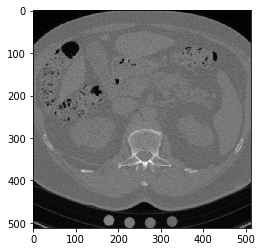

In [ ]:
# Welcome to the first demo
print 'SimpleITK Image Basics'

# <demo> --- stop ---

# Every demo starts by importing the SimpleITK module
import SimpleITK as sitk

# <demo> --- stop ---

# Create an image
image = sitk.Image ( 256, 128, 64, sitk.sitkInt16 );
# How about 2d?
twoD = sitk.Image ( 64, 64, sitk.sitkFloat32 )

# <demo> --- stop ---

# What can an image do for us?
help ( image )

# <demo> --- stop ---

# Number of dimensions
image.GetDimension()

# <demo> --- stop ---

# Size of the image
image.GetSize()

# <demo> --- stop ---

# Individual demensions
print image.GetWidth()
print image.GetHeight()
print image.GetDepth()

# <demo> --- stop ---

# Origin and Spacing
print image.GetOrigin()
print image.GetSpacing()

# <demo> --- stop ---

# Pixel type
print image.GetPixelIDValue()
print image.GetPixelIDTypeAsString()

# <demo> --- stop ---

# Addressing pixels, details in the presentation
print image.GetPixel ( 0, 0, 0 )
image.SetPixel ( 0, 0, 0, 1 )
print image.GetPixel ( 0, 0, 0 )

# <demo> --- stop ---

# Addressing pixels the easier way, details in the presentation
print image[0,0,0]
image[0,0,0] = 10
print image[0,0,0]

# <demo> --- stop ---